# Simulations

Here I am simulating some square waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.fft import fft, fft2,fftshift, fftfreq

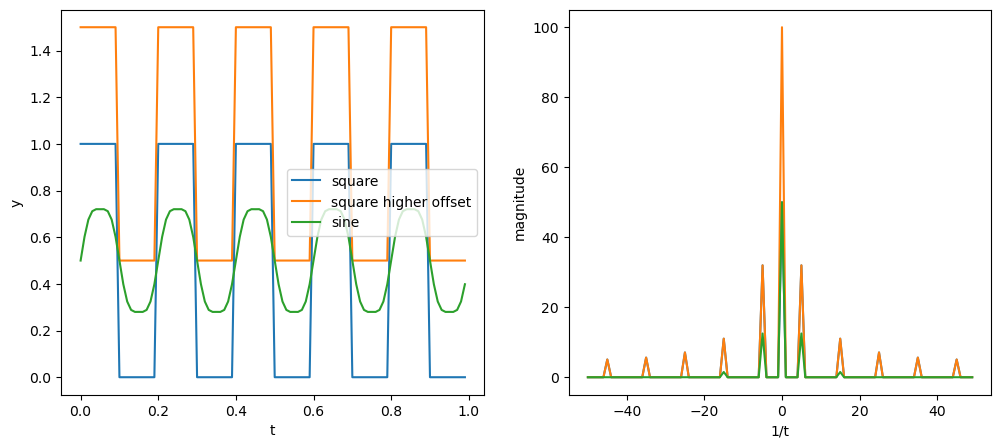

In [2]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
N_points = 100
t = np.linspace(0, 1, N_points, endpoint=False)

# Plot idealised original grating function
wave = 0.5*sp.signal.square(2*np.pi* 5 * t) + 0.5
wave_2 = 0.5*sp.signal.square(2*np.pi* 5 * t) + 1

# Add realistic 'modulated' function
sine_wave = 0.25* np.sin(2*np.pi* 5 * t) + 0.03* np.sin(6*np.pi* 5 * t) +0.5
ax[0].plot(t, wave, label='square')
ax[0].plot(t, wave_2, label='square higher offset')
ax[0].plot(t, sine_wave, label='sine')
ax[0].set_ylabel('y')
ax[0].set_xlabel('t')
ax[0].legend()

# Undergo Fourier transforms
# Plot absolute value (to get MTF)
fft_frequencies = fftshift(fftfreq(len(t), d=1/N_points))
ax[1].plot(fft_frequencies,fftshift(np.abs(fft(wave))))
ax[1].plot(fft_frequencies,fftshift(np.abs(fft(wave_2))))
ax[1].plot(fft_frequencies,fftshift(np.abs(fft(sine_wave))))
ax[1].set_xlabel('1/t')
ax[1].set_ylabel('magnitude')
plt.show()

# DOF Model

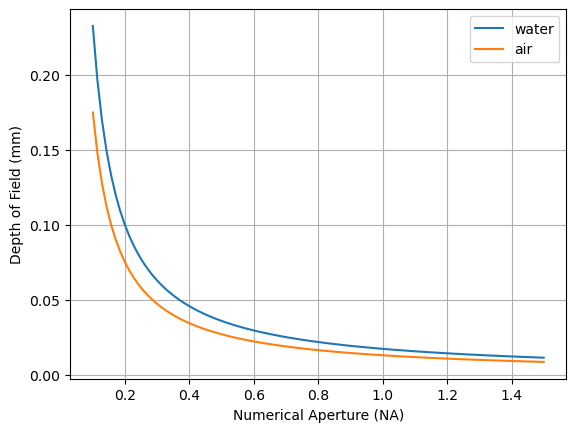

In [3]:
def dof(NA, lamb, M, n_bath, e):

    return n_bath * (lamb / (NA*NA) + e/ (M*NA))

NA = np.linspace(0.1, 1.5, 100)
plt.plot(NA, dof(NA, 500e-9, 0.5, 1.33,  6.25e-6)*1000, label='water')
plt.plot(NA, dof(NA, 500e-9, 0.5, 1,  6.25e-6)*1000, label='air')

plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture (NA)')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Expected DOF variation with NA')

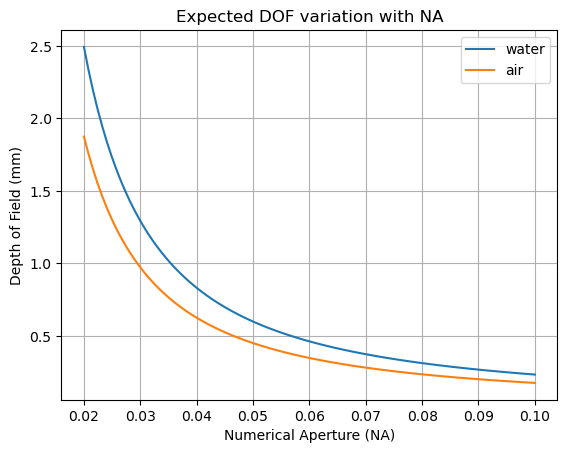

In [4]:
NA = np.linspace(0.02, 0.1, 100)
plt.plot(NA, dof(NA, 500e-9, 0.5, 1.33,  6.25e-6)*1000, label='water')
plt.plot(NA, dof(NA, 500e-9, 0.5, 1,  6.25e-6)*1000, label='air')

plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture (NA)')
plt.grid()
plt.legend()
plt.title('Expected DOF variation with NA')

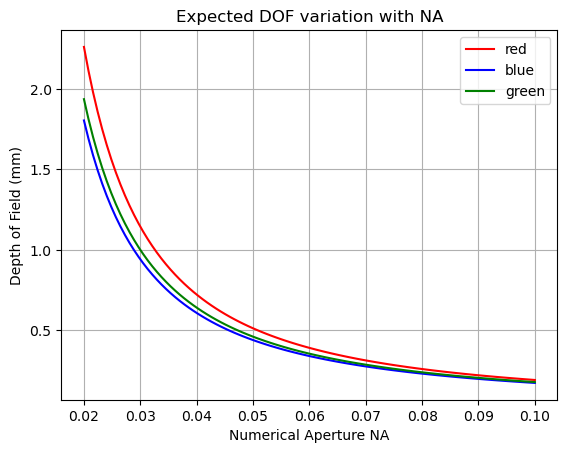

In [5]:
lambs = np.linspace(300, 800, 100)
plt.plot(NA, dof(NA, 655e-9, 0.5, 1,  6.25e-6)*1000, label='red', c='red')
plt.plot(NA, dof(NA, 472e-9, 0.5, 1,  6.25e-6)*1000, label='blue', c='blue')
plt.plot(NA, dof(NA, 525e-9, 0.5, 1,  6.25e-6)*1000, label='green', c='green')
plt.title('Expected DOF variation with NA')
plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture NA')
plt.grid()
plt.legend()

# Diffraction-Limited MTF

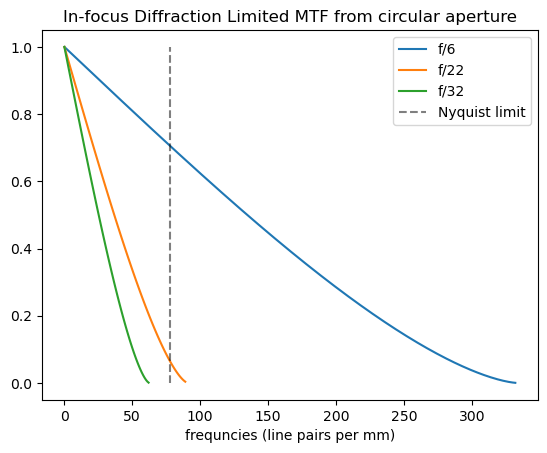

In [29]:
def MTF(v, N):
    # N = 6 # f-number
    lamb = 500e-6

    phi = np.arccos(lamb*v * N)
    return 2/np.pi * (phi - np.cos(phi)*np.sin(phi))
e = 6.45/1000
v = np.arange(0, 333)
plt.plot(v, MTF(v, 6), label='f/6')
v = np.arange(0, 90)
plt.plot(v, MTF(v, 22), label='f/22')
v = np.arange(0, 63)
plt.plot(v, MTF(v, 32), label='f/32')
plt.xlabel('frequncies (line pairs per mm)')

plt.title('In-focus Diffraction Limited MTF from circular aperture')
plt.vlines(1/(2*e), 0, 1, alpha = 0.5, ls = '--', color='black', label='Nyquist limit')
plt.legend()

In [ ]:
# Defocus model

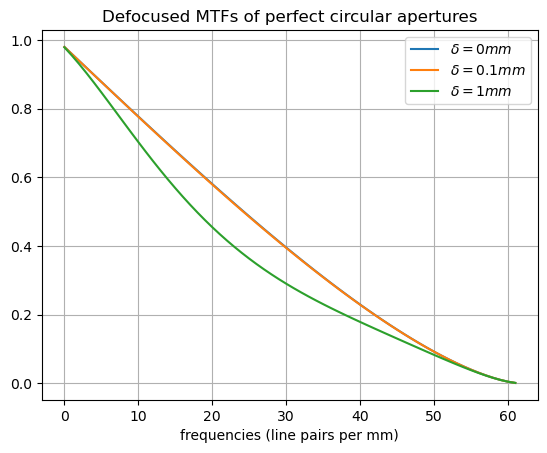

In [73]:
from scipy.special import jv

def defocus_factor(v, N, delta):
    # delta is defocus

    lamb = 500e-6 # mm

    v0= 1/(lamb* N)
    x = np.pi * delta*v*(v-v0)/v0 / N
    return 2*jv(1, x)/x
N = 32
v = np.arange(1,63)
plt.title('Defocused MTFs of perfect circular apertures')

plt.plot(MTF(v, N), label='$\delta = 0 mm$')
plt.plot(MTF(v, N)*defocus_factor(v, N, 0.1), label='$\delta = 0.1 mm$')
plt.plot(MTF(v, N)*defocus_factor(v, N, 1), label='$\delta = 1 mm$')
plt.grid()
plt.xlabel('frequencies (line pairs per mm)')
plt.legend()